# Step 1: Explore the Datasets
# _______________________________________________________________

1. `yelp_business.json`: establishment data regarding location and attributes for all business in the dataset.
2. `yelp_review.json`: Yelp review metadata by business.
3. `yelp_user.json`: user profile metadata by business.
4. `yelp_checkin.json`: online checkin metadata by business.
5. `yelp_tip.json:` tip metadata by business.
6. `yelp_photo.json`: photo metadata by business.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [138]:
#Load all the data sets
businesses_df = pd.read_json('datasets/yelp_regression_project/yelp_business.json', lines=True) #mutiple json objects in dataset
reviews_df = pd.read_json('datasets/yelp_regression_project/yelp_review.json', lines=True)
users_df = pd.read_json('datasets/yelp_regression_project/yelp_user.json', lines=True)
checkins_df = pd.read_json('datasets/yelp_regression_project/yelp_checkin.json', lines=True)
tips_df = pd.read_json('datasets/yelp_regression_project/yelp_tip.json', lines=True)
photos_df = pd.read_json('datasets/yelp_regression_project/yelp_photo.json', lines=True)

In [139]:
businesses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             188593 non-null  object 
 1   alcohol?            188593 non-null  int64  
 2   attributes          162807 non-null  object 
 3   business_id         188593 non-null  object 
 4   categories          188052 non-null  object 
 5   city                188593 non-null  object 
 6   good_for_kids       188593 non-null  int64  
 7   has_bike_parking    188593 non-null  int64  
 8   has_wifi            188593 non-null  int64  
 9   hours               143791 non-null  object 
 10  is_open             188593 non-null  int64  
 11  latitude            188587 non-null  float64
 12  longitude           188587 non-null  float64
 13  name                188593 non-null  object 
 14  neighborhood        188593 non-null  object 
 15  postal_code         188593 non-nul

In [140]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   business_id               188593 non-null  object 
 1   average_review_age        188593 non-null  float64
 2   average_review_length     188593 non-null  float64
 3   average_review_sentiment  188593 non-null  float64
 4   number_funny_votes        188593 non-null  int64  
 5   number_cool_votes         188593 non-null  int64  
 6   number_useful_votes       188593 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 10.1+ MB


In [141]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 188593 non-null  object 
 1   average_number_friends      188593 non-null  float64
 2   average_days_on_yelp        188593 non-null  float64
 3   average_number_fans         188593 non-null  float64
 4   average_review_count        188593 non-null  float64
 5   average_number_years_elite  188593 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.6+ MB


In [142]:
checkins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   business_id       157075 non-null  object
 1   time              157075 non-null  object
 2   weekday_checkins  157075 non-null  int64 
 3   weekend_checkins  157075 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


In [143]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121526 entries, 0 to 121525
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         121526 non-null  object 
 1   average_tip_length  121526 non-null  float64
 2   number_tips         121526 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ MB


In [144]:
photos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32976 entries, 0 to 32975
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             32976 non-null  object 
 1   average_caption_length  32976 non-null  float64
 2   number_pics             32976 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 773.0+ KB


# Step 1: Explore the Datasets – Conclusion

During the initial exploration of the datasets, several important findings were made:

## Key Findings

### 1. Shared `business_id` Column Across Datasets
- A key relationship between datasets is the `business_id` column, which acts as a primary identifier. 
- This enables joining the datasets for deeper analysis and integrating information about businesses across multiple dimensions.

### 2. Missing Data in Some Columns
- Certain columns within the datasets have missing or null values.
- This suggests the need for data cleaning or imputation to handle incomplete data effectively before performing any analysis.

### 3. Data Types and Formats
- The datasets contain a variety of data types, including strings, numbers, and categorical values. 
- Columns like `categories` or `attributes` may require further transformation or parsing due to their nested or string-encoded structures.

### 4. Large File Sizes
- The datasets are relatively large, indicating that memory optimization techniques, such as reading in chunks or working with a subset of data, might be necessary during analysis.


### 5. Dataset-Specific Observations
- **Business Dataset**: Contains essential details about businesses, including name, location, and category. Some businesses lack complete information on attributes like `hours` or `categories`.
- **Review Dataset**: Contains user-generated content that can be analyzed for sentiment, trends, and customer feedback patterns. Text fields may need preprocessing.
- **Check-in Dataset**: Provides insights into business foot traffic but may have sporadic or incomplete records.
- **User Dataset**: Includes user information, useful for understanding reviewer demographics or loyalty trends.

### 6. Preliminary Cleaning Needs
- Handling missing values, inconsistent data types, and duplicate records will be a necessary step before conducting in-depth analysis.



# Step 2: Merge the Datasets

# __________________________________________________________________

In this step I will merge the datasets into a single dataset. This will allow me to analyze the different features with respect to the target variable I am trying to predict.

In [145]:
#Create a list of Dataframes that need to be merged.
df_list_to_merge = [businesses_df, reviews_df, users_df, checkins_df, tips_df, photos_df]

In [146]:
#Create an empty Dataframe that will be used as the single DataFrame.
yelp_df = pd.DataFrame()

#For loop to merge each DataFrame within the df_list_to_merge
for df in df_list_to_merge:
    if yelp_df.empty:
        yelp_df = df
    else:
        yelp_df = yelp_df.merge(right=df, how='outer', on='business_id', suffixes=('', '_dup')) # Suffixes checks for duplicate columns

In [147]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   address                     188593 non-null  object 
 1   alcohol?                    188593 non-null  int64  
 2   attributes                  162807 non-null  object 
 3   business_id                 188593 non-null  object 
 4   categories                  188052 non-null  object 
 5   city                        188593 non-null  object 
 6   good_for_kids               188593 non-null  int64  
 7   has_bike_parking            188593 non-null  int64  
 8   has_wifi                    188593 non-null  int64  
 9   hours                       143791 non-null  object 
 10  is_open                     188593 non-null  int64  
 11  latitude                    188587 non-null  float64
 12  longitude                   188587 non-null  float64
 13  name          

# Step 2: Merge the Datasets - Conclusion
__________________________________________________________________

To complete this step, I first created `df_list_to_merge`, a list object to hold all the datasets that needed to be merged. Next, I initialized `yelp_df` as an empty Pandas DataFrame to store the merged results.

I then created a `for loop` that iterated through `df_list_to_merge` and merged `yelp_df` with each subsequent DataFrame in the list. Within the `merge` method, I used the following parameters:

- **`right=df`**: This ensured that `yelp_df` was consistently merged with the next DataFrame in the list.
- **`on='business_id'`**: This specified the `business_id` column as the primary key for the merge operation.
- **`how='outer'`**: I chose an outer join to include all rows from each DataFrame, ensuring no data was lost even if there was no match on `business_id`.
- **`suffixes=('', '_dup')`**: This allowed me to track potential duplicate columns created during the merge process.

The final merged DataFrame, `yelp_df`, now contains 40 columns, representing the combination of information from all the original datasets.


# Step 3: Prepare and Clean the Data
__________________________________________________________________

In this step, I will prepare and clean the data for analysis and machine learning. The tasks include:

- **Ensuring consistency in data formats**: 
  Standardizing the format of columns (e.g., date, numerical values, or categorical data).

- **Handling missing values**: Addressing any `NaN` or null values by:
  - Using the `.fillna()` method to replace `NaN` or missing values with `0`.
  - Using the `.dropna()` method to drop rows or columns where values are missing or `NaN`.

- **Removing irrelevant columns**: 
  Dropping columns that do not contribute to analysis or the training of the machine learning model using the `drop()` method.

This step ensures that the dataset is clean, consistent, and ready for meaningful analysis and accurate machine learning predictions.

In [148]:
#Create a list of columns to be dropped.
irrevelant_columns_to_drop = ['business_id', 'city','name', 'state','address', 'attributes', 'neighborhood','categories', 'hours', 'latitude', 'longitude', 'postal_code', 'time']

In [149]:
#Use the drop() method to drop all of the unecessary columns.
yelp_df = yelp_df.drop(columns=irrevelant_columns_to_drop)

In [150]:
#Check the DataFrame after drop.
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   alcohol?                    188593 non-null  int64  
 1   good_for_kids               188593 non-null  int64  
 2   has_bike_parking            188593 non-null  int64  
 3   has_wifi                    188593 non-null  int64  
 4   is_open                     188593 non-null  int64  
 5   price_range                 188593 non-null  int64  
 6   review_count                188593 non-null  int64  
 7   stars                       188593 non-null  float64
 8   take_reservations           188593 non-null  int64  
 9   takes_credit_cards          188593 non-null  int64  
 10  average_review_age          188593 non-null  float64
 11  average_review_length       188593 non-null  float64
 12  average_review_sentiment    188593 non-null  float64
 13  number_funny_v

In [151]:
#Identify any columnns with missing or NaN values.
yelp_df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
is_open                       False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [152]:
yelp_df = yelp_df.fillna(value=0)

In [153]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   alcohol?                    188593 non-null  int64  
 1   good_for_kids               188593 non-null  int64  
 2   has_bike_parking            188593 non-null  int64  
 3   has_wifi                    188593 non-null  int64  
 4   is_open                     188593 non-null  int64  
 5   price_range                 188593 non-null  int64  
 6   review_count                188593 non-null  int64  
 7   stars                       188593 non-null  float64
 8   take_reservations           188593 non-null  int64  
 9   takes_credit_cards          188593 non-null  int64  
 10  average_review_age          188593 non-null  float64
 11  average_review_length       188593 non-null  float64
 12  average_review_sentiment    188593 non-null  float64
 13  number_funny_v

# Step 3: Prepare and Clean the Data - Conclusion

To complete this step, I began by identifying columns in the dataset that were unnecessary for the machine learning model. I created a list object called `irrelevant_columns_to_drop` and added the labels of these columns. The columns I decided to drop were:

- **`address`**: This column was unnecessary because physical address information does not contribute to the predictive power of the model.
- **`attributes`**: This column contained detailed metadata that was either redundant or irrelevant for the problem at hand.
- **`neighborhood`**: Similar to `address`, this data was not essential for the analysis.
- **`categories`**: Although informative, this column was excluded due to the high cardinality and potential complexity it added to the model.
- **`hours`**: Operational hours were excluded because they are unlikely to significantly impact the model's outcome.
- **`latitude`** and **`longitude`**: These were removed as they primarily represent location data, which was not relevant for this analysis.
- **`postal_code`**: This column was omitted for the same reason as `latitude` and `longitude`.
- **`time`**: This data was not pertinent to the model's purpose.

After dropping the above columns, I checked the dataset for missing values using the `.isna()` method. This method helped me identify columns with null values, and the `.any()` method provided a boolean series for a quick overview.

Finally, I handled the missing values in the dataset using the `.fillna(value=0)` method. This step ensured that all missing values were replaced with `0`, maintaining a consistent and clean dataset for further analysis.


# Step 4: Correlation Analysis and Feature Selection

In this step I will investigate some of the different features in the dataset and see how they best correlate with the target varible (`stars`).

In [154]:
# Create a correlation DataFrame 
correlation_df = yelp_df.corr()

In [155]:
# Extract the stars columnn and sort the values in descending order.
correlation_df['stars'].sort_values(ascending=False)

stars                         1.000000
average_review_sentiment      0.782187
has_bike_parking              0.068084
is_open                       0.051913
number_cool_votes             0.043375
takes_credit_cards            0.037748
review_count                  0.032413
number_tips                   0.014038
weekend_checkins              0.007863
weekday_checkins              0.004130
number_pics                   0.001727
number_funny_votes            0.001320
average_caption_length        0.000040
number_useful_votes          -0.000066
average_number_friends       -0.007629
take_reservations            -0.024486
good_for_kids                -0.030382
average_number_fans          -0.031141
average_days_on_yelp         -0.038061
has_wifi                     -0.039857
alcohol?                     -0.043332
price_range                  -0.052565
average_tip_length           -0.052899
average_number_years_elite   -0.064419
average_review_count         -0.066572
average_review_age       

# Step 4: Correlation Analysis and Feature Selection - Conclusion

In this step, I determined that the strongest feature correlated with the target variable (`stars`) is **`average_review_sentiment`**, with a correlation coefficient of **0.782**. This strong positive relationship indicates that this feature will likely be a key predictor in the machine learning model.


# Step 5: Split Data into Training and Testing Sets

In this step I will split my data into training and testing sets to evaluate the performance of my machine learning model.

In [231]:
# Create multiple subsets
strongest_corr = ['average_review_sentiment'] # Score .61 both
all_columns = [col for col in yelp_df.columns if col != 'stars'] # Score .68 and .67
all_postive_corr = ['average_review_sentiment', 'has_bike_parking', 
                    'is_open', 'number_cool_votes', 'takes_credit_cards', 
                    'review_count', 'number_tips', 'weekend_checkins', 'weekday_checkins',
                   'number_pics', 'number_funny_votes'] # Score .62 both
all_negative_corr = ['take_reservations', 'good_for_kids', 'average_number_fans', 'average_days_on_yelp',
                    'has_wifi', 'alcohol?', 'price_range', 'average_tip_length', 'average_review_count',
                    'average_review_age', 'average_review_length'] # Score .11 and .10


In [233]:
# Delcare the features (independent varibale).
features = yelp_df[all_negative_corr]

In [234]:
# Declare trhe tagret (dependent variable).
target = yelp_df['stars']

In [235]:
# Use the train_test_split method to split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=1)

In [236]:
print(f'The x_train shape: {x_train.shape}')
print(f'The x_test shape: {x_test.shape}')

The x_train shape: (150874, 11)
The x_test shape: (37719, 11)


# Step 5: Split Data into Training and Testing Sets - Conclusion

In this step, I successfully split the dataset into training and testing sets using scikit-learn's `train_test_split` function. The data was divided with 80% allocated for training and 20% for testing, ensuring a good balance for model evaluation. 

The following configurations were used:
- **Feature (`X`)**: The independent variable `average_review_sentiment`.
- **Target (`y`)**: The dependent variable `stars`.
- **Test size**: 20% of the dataset was reserved for testing.
- **Random state**: A fixed value of `1` was used to ensure reproducibility.

After splitting:
- The training set contains **150,874 samples** for training the model.
- The testing set contains **37,719 samples** for evaluating the model.

This split ensures that the model will have enough data to learn patterns while also being tested on unseen data to assess its performance.


# Step 6: Train the Machine Learning Model

In this step I will use the training sets to train a linear regression model.

In [237]:
# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

In [238]:
# Use the fit method to determine the line of best fit. 
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [239]:
print(f'The score for x_train and y_train is: {linear_regression_model.score(x_train, y_train)}')
print(f'The score for x_test and y_test is: {linear_regression_model.score(x_test, y_test)}')

The score for x_train and y_train is: 0.11078060021599001
The score for x_test and y_test is: 0.108406728615283


In [197]:
print(f'The coefficients are: {linear_regression_model.coef_}')
print(f'The intercept is: {linear_regression_model.intercept_}')

The coefficients are: [ 2.33541795e+00 -7.01736328e-02  2.66719753e-01  7.10374379e-04
 -2.07473943e-02 -7.47635951e-05 -1.48526434e-03 -6.60904440e-05
  6.62435199e-05 -3.91439279e-03 -2.04917665e-04]
The intercept is: 2.1592261203473306


In [198]:
y_predicited = linear_regression_model.predict(x_test)

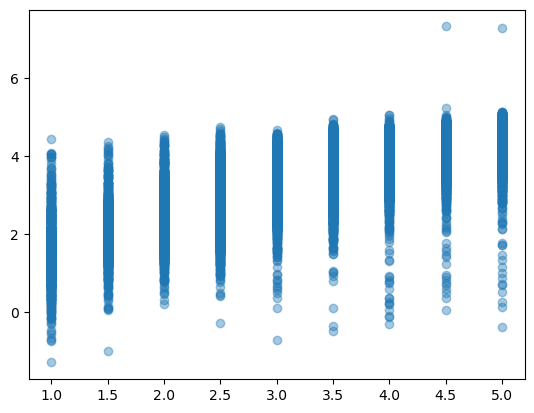

In [167]:
plt.scatter(y_test, y_predicited, alpha=0.4)